<a href="https://colab.research.google.com/github/AlexeyMakovskiy/diplomHSE/blob/main/diplom_HSE(fr_2000).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

датасет  Genius Song Lyrics

Часть 1 тематическое моделирование

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.7.0/fr_core_news_sm-3.7.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-3.7.0-py3-none-any.whl size=16263938 sha256=38b47a311ccf2402c6b426b3a98a50293cded26cb098828f93942b94441fd7a6
  Stored in directory: /root/.cache/pip/wheels/5f/22/1e/546518ae166e75ff56a6ec9d8fd40afb02c53ecaf96884f890
Successfully built fr-core-news-sm


In [ ]:
# Тематическое моделирование

import spacy
import pandas as pd
import requests
from nltk.corpus import stopwords
from nltk import download
import gensim
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np


download('stopwords')
df = pd.read_csv('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/df_2000_2005(fr).csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/df_2006_2009(fr).csv')
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11375 entries, 0 to 11374
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          11375 non-null  object
 1   tag            11375 non-null  object
 2   artist         11375 non-null  object
 3   year           11375 non-null  int64 
 4   views          11375 non-null  int64 
 5   features       11375 non-null  object
 6   lyrics         11375 non-null  object
 7   id             11375 non-null  int64 
 8   language_cld3  11375 non-null  object
 9   language_ft    11375 non-null  object
 10  language       11375 non-null  object
dtypes: int64(3), object(8)
memory usage: 977.7+ KB


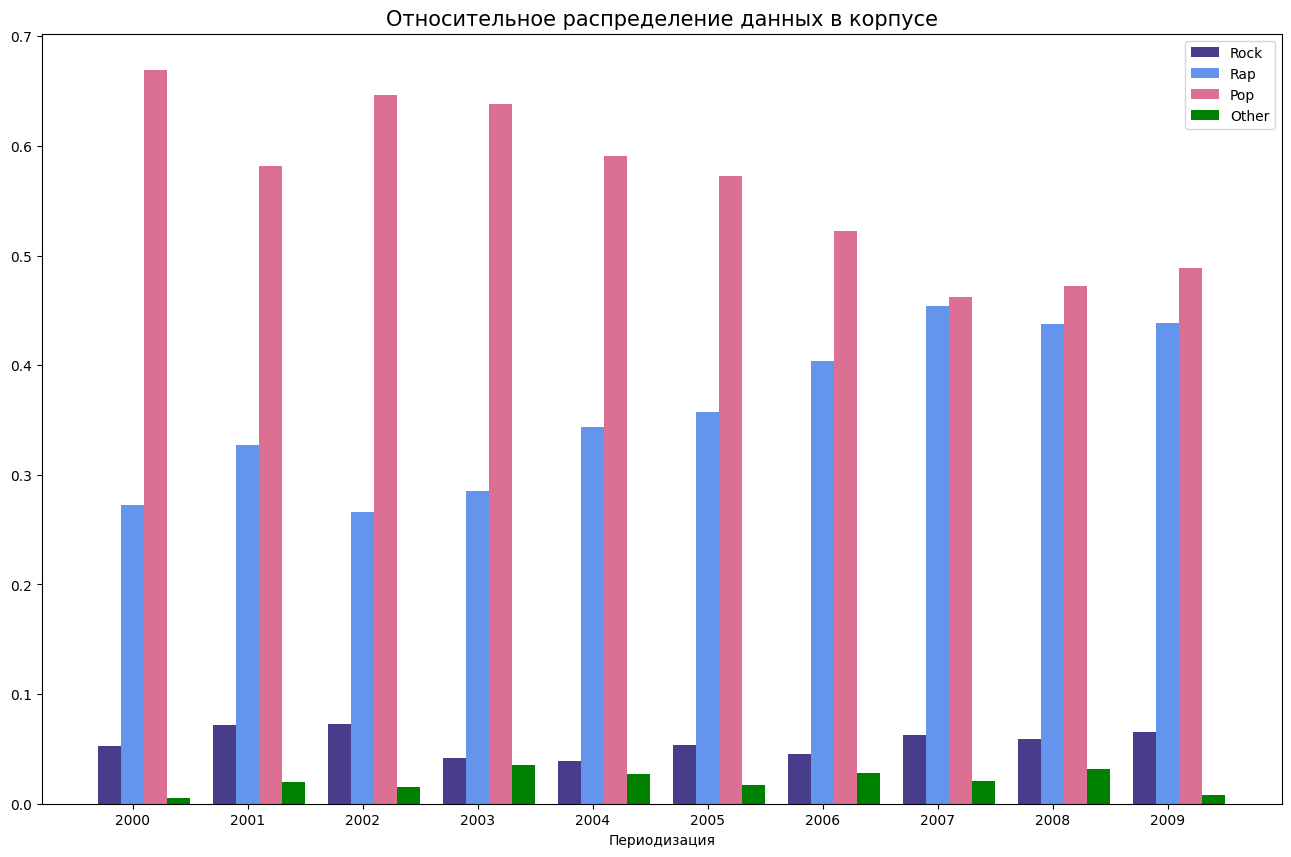

In [ ]:
# Визуальзация структуры корпуса
df_fr_2000 = df[(df['year']== 2000)].sort_values(by=['tag'])
df_fr_2001 = df[(df['year']== 2001)].sort_values(by=['tag'])
df_fr_2002 = df[(df['year']== 2002)].sort_values(by=['tag'])
df_fr_2003 = df[(df['year']== 2003)].sort_values(by=['tag'])
df_fr_2004 = df[(df['year']== 2004)].sort_values(by=['tag'])
df_fr_2005 = df[(df['year']== 2005)].sort_values(by=['tag'])
df_fr_2006 = df_2[(df_2['year']== 2006)].sort_values(by=['tag'])
df_fr_2007 = df_2[(df_2['year']== 2007)].sort_values(by=['tag'])
df_fr_2008 = df_2[(df_2['year']== 2008)].sort_values(by=['tag'])
df_fr_2009 = df_2[(df_2['year']== 2009)].sort_values(by=['tag'])
#df_fr_2010 = df_2[(df_2['year']== 2010)].sort_values(by=['tag'])

colors = ['darkslateblue', 'cornflowerblue', 'palevioletred', 'green']
period = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']


rock = [len(df_fr_2000[(df_fr_2000['tag'] == 'rock')])/len(df_fr_2000),
        len(df_fr_2001[(df_fr_2001['tag'] == 'rock')])/len(df_fr_2001),
        len(df_fr_2002[(df_fr_2002['tag'] == 'rock')])/len(df_fr_2002),
        len(df_fr_2003[(df_fr_2003['tag'] == 'rock')])/len(df_fr_2003),
        len(df_fr_2004[(df_fr_2004['tag'] == 'rock')])/len(df_fr_2004),
        len(df_fr_2005[(df_fr_2005['tag'] == 'rock')])/len(df_fr_2005),
        len(df_fr_2006[(df_fr_2006['tag'] == 'rock')])/len(df_fr_2006),
        len(df_fr_2007[(df_fr_2007['tag'] == 'rock')])/len(df_fr_2007),
        len(df_fr_2008[(df_fr_2008['tag'] == 'rock')])/len(df_fr_2008),
        len(df_fr_2009[(df_fr_2009['tag'] == 'rock')])/len(df_fr_2009)]
#        len(df_fr_2010[(df_fr_2010['tag'] == 'rock')])/len(df_fr_2010)]

rap = [len(df_fr_2000[(df_fr_2000['tag'] == 'rap')])/len(df_fr_2000),
       len(df_fr_2001[(df_fr_2001['tag'] == 'rap')])/len(df_fr_2001),
       len(df_fr_2002[(df_fr_2002['tag'] == 'rap')])/len(df_fr_2002),
       len(df_fr_2003[(df_fr_2003['tag'] == 'rap')])/len(df_fr_2003),
       len(df_fr_2004[(df_fr_2004['tag'] == 'rap')])/len(df_fr_2004),
       len(df_fr_2005[(df_fr_2005['tag'] == 'rap')])/len(df_fr_2005),
       len(df_fr_2006[(df_fr_2006['tag'] == 'rap')])/len(df_fr_2006),
       len(df_fr_2007[(df_fr_2007['tag'] == 'rap')])/len(df_fr_2007),
       len(df_fr_2008[(df_fr_2008['tag'] == 'rap')])/len(df_fr_2008),
       len(df_fr_2009[(df_fr_2009['tag'] == 'rap')])/len(df_fr_2009)]
 #      len(df_fr_2010[(df_fr_2010['tag'] == 'rap')])/len(df_fr_2010)]

pop = [len(df_fr_2000[(df_fr_2000['tag'] == 'pop')])/len(df_fr_2000),
       len(df_fr_2001[(df_fr_2001['tag'] == 'pop')])/len(df_fr_2001),
       len(df_fr_2002[(df_fr_2002['tag'] == 'pop')])/len(df_fr_2002),
       len(df_fr_2003[(df_fr_2003['tag'] == 'pop')])/len(df_fr_2003),
       len(df_fr_2004[(df_fr_2004['tag'] == 'pop')])/len(df_fr_2004),
       len(df_fr_2005[(df_fr_2005['tag'] == 'pop')])/len(df_fr_2005),
       len(df_fr_2006[(df_fr_2006['tag'] == 'pop')])/len(df_fr_2006),
       len(df_fr_2007[(df_fr_2007['tag'] == 'pop')])/len(df_fr_2007),
       len(df_fr_2008[(df_fr_2008['tag'] == 'pop')])/len(df_fr_2008),
       len(df_fr_2009[(df_fr_2009['tag'] == 'pop')])/len(df_fr_2009)]
#       len(df_fr_2010[(df_fr_2010['tag'] == 'pop')])/len(df_fr_2010)]

other = [len(df_fr_2000[(df_fr_2000['tag'] != 'rock')&(df_fr_2000['tag'] != 'pop')&(df_fr_2000['tag'] != 'rap')])/len(df_fr_2000),
         len(df_fr_2001[(df_fr_2001['tag'] != 'rock')&(df_fr_2001['tag'] != 'pop')&(df_fr_2001['tag'] != 'rap')])/len(df_fr_2001),
         len(df_fr_2002[(df_fr_2002['tag'] != 'rock')&(df_fr_2002['tag'] != 'pop')&(df_fr_2002['tag'] != 'rap')])/len(df_fr_2002),
         len(df_fr_2003[(df_fr_2003['tag'] != 'rock')&(df_fr_2003['tag'] != 'pop')&(df_fr_2003['tag'] != 'rap')])/len(df_fr_2003),
         len(df_fr_2004[(df_fr_2004['tag'] != 'rock')&(df_fr_2004['tag'] != 'pop')&(df_fr_2004['tag'] != 'rap')])/len(df_fr_2004),
         len(df_fr_2005[(df_fr_2005['tag'] != 'rock')&(df_fr_2005['tag'] != 'pop')&(df_fr_2005['tag'] != 'rap')])/len(df_fr_2005),
         len(df_fr_2006[(df_fr_2006['tag'] != 'rock')&(df_fr_2006['tag'] != 'pop')&(df_fr_2006['tag'] != 'rap')])/len(df_fr_2006),
         len(df_fr_2007[(df_fr_2007['tag'] != 'rock')&(df_fr_2007['tag'] != 'pop')&(df_fr_2007['tag'] != 'rap')])/len(df_fr_2007),
         len(df_fr_2008[(df_fr_2008['tag'] != 'rock')&(df_fr_2008['tag'] != 'pop')&(df_fr_2008['tag'] != 'rap')])/len(df_fr_2008),
         len(df_fr_2009[(df_fr_2009['tag'] != 'rock')&(df_fr_2009['tag'] != 'pop')&(df_fr_2009['tag'] != 'rap')])/len(df_fr_2009)]
 #        len(df_fru_2010[(df_fru_2010['tag'] != 'rock')&(df_fru_2010['tag'] != 'pop')&(df_fru_2010['tag'] != 'rap')])/len(df_fru_2010)]

# Multi bar Chart
plt.figure(figsize=(16,10))

x_axis = np.arange(len(period))
plt.bar(x_axis, rock, color = colors[0], width=0.2, label = 'Rock')
plt.bar(x_axis +0.2, rap, color = colors[1], width=0.2, label = 'Rap')
plt.bar(x_axis +0.2*2, pop, color = colors[2], width=0.2, label = 'Pop')
plt.bar(x_axis +0.2*3, other, color = colors[3], width=0.2, label = 'Other')

plt.xticks(x_axis+0.2, period)

# Add x and ylabels
plt.xlabel('Периодизация')
#plt.ylabel('Количество вхождений в базе данных')
plt.title(label="Относительное распределение данных в корпусе",
          fontsize=15,
          color="black")
plt.legend()
plt.show()



из построенной гистограммы видно, что в отличии от корпуса русских песен, доля песен на французском в жанре ROCK остается относительно постоянной, но начиная с 2003-2004г происходит перераспределение интереса в жанре POP и RAP (справедливости ради французский рок на мой взгляд нечно ужасное может тут можно развить "гипотеза Сепира — Уорфа")

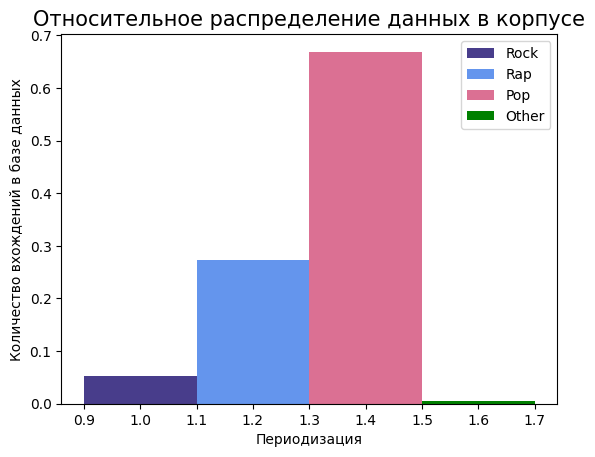

In [ ]:
# Визуальзация структуры корпуса
df_fr_2000 = df[(df['year']== 2000)].sort_values(by=['tag'])

colors = ['darkslateblue', 'cornflowerblue', 'palevioletred', 'green']
period = ['2000']


rock = [len(df_fr_2000[(df_fr_2000['tag'] == 'rock')])/len(df_fr_2000)]
rap = [len(df_fr_2000[(df_fr_2000['tag'] == 'rap')])/len(df_fr_2000)]
pop = [len(df_fr_2000[(df_fr_2000['tag'] == 'pop')])/len(df_fr_2000)]
other = [len(df_fr_2000[(df_fr_2000['tag'] != 'rock')&(df_fr_2000['tag'] != 'pop')&(df_fr_2000['tag'] != 'rap')])/len(df_fr_2000)]

# Multi bar Chart
x_axis = 1
plt.bar(x_axis, rock, color = colors[0], width=0.2, label = 'Rock')
plt.bar(x_axis +0.2, rap, color = colors[1], width=0.2, label = 'Rap')
plt.bar(x_axis +0.2*2, pop, color = colors[2], width=0.2, label = 'Pop')
plt.bar(x_axis +0.2*3, other, color = colors[3], width=0.2, label = 'Other')

# Add x and ylabels
plt.xlabel('Периодизация')
plt.ylabel('Количество вхождений в базе данных')
plt.title(label="Относительное распределение данных в корпусе",
          fontsize=15,
          color="black")
plt.legend()
plt.show()

Часть 1.1 Моделирование общего корпуса

In [ ]:
# Собираем текст из слов

full_texts = []
for index, row in df.iterrows():
    if (pd.notnull(row['lyrics'])) and (row['year'] == 2000):
        full_texts.append(row['lyrics'])

In [ ]:
full_texts[1:10]

In [ ]:
punctuation = '!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~—»«...–'
filter = stopwords.words('french') + list(punctuation) + stopwords.words('english')

In [ ]:
# Функция для предобработки, которая токенизирует, лемматизирует и делает все буквы строчными

def preprocess(input_text):
    nlp = spacy.load("fr_core_news_sm")
    tokenized_text = nlp(input_text)
    lowercase_text = [token.text.lower() for token in tokenized_text]
    ## убираем пунктуацию и стоп-слова:
    output_text = [token for token in lowercase_text if token not in filter]
    clean_text = [word for word in output_text if word.isalpha()]
    return clean_text

In [ ]:
preprocessed_texts = []
for text in tqdm(full_texts):
    if isinstance(text, str):
        preprocessed_text = preprocess(text)
        preprocessed_texts.append(preprocessed_text)
    else:
        continue

100%|██████████| 1356/1356 [46:45<00:00,  2.07s/it]


In [ ]:
# Save preprocessed texts to a file on Google Drive
from google.colab import drive
drive.mount('drive')
with open('drive/My Drive/HSE_diploma/fr_file_2000.txt', 'w') as output:
    output.write(str(preprocessed_texts))

Mounted at drive


Тематическое моделирование (анализ частотностей TF-IDF)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import string
import glob
import re

In [ ]:
# Функция для предобработки, которая делает все буквы строчными и удаляет стопслова
def prep_tfidf(input_text):
    words = input_text.split()
    final = []
    for word in words:
        word = word.lower()
        if word not in filter:
            final.append(word)
    final = " ".join(final)
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)


In [ ]:
cleaned_docs = []
for text in (full_texts):
    if isinstance(text, str):
        preprocessed_text = prep_tfidf(text)
        cleaned_docs.append(preprocessed_text)
    else:
        continue

cleaned_docs[1]

"[couplet ] quand vient fin semaine prend petits binious part jouer vieilles rengaines lorraine poitou rois mariage soirée privée d'l'amicale troisième âge grand bal pompiers camps vacances c'est qu'on met l'ambiance habits galas fait bamboula oui c'est zoulous oui c'est zazous toutes filles courent après faire bisous ça rend tous leurs maris jaloux [refrain] plus beau métier monde c’est celui musicien entrer ronde faut jouer d’un machin [couplet ] l’air peu stupide l’heure d'être réglé demande liquide c'est plus facile cacher quand moment s’y prête fait passer chapeau propose cassettes l’on vend sous manteau vit comme rentiers comme si riches aime bien picoler fumer haschich oui c'est zoulous oui c'est zazous demande joue tout tata yo-yo big bisou ça faut donner sous [refrain] plus vieux métier monde juste après faire tapin deux blanches ronde c’est celui musicien [couplet ] l’essentiel plaire d’ambiancer soirée fait rire femme maire tripote mariée cravate traviole fait voir tout peti

In [ ]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,1),
                                stop_words = filter
                      )

vectors = vectorizer.fit_transform(cleaned_docs)

feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()

In [ ]:
all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
#print (full_texts[0])
#print (all_keywords[0])

In [ ]:
true_k = 10

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [ ]:
#разделение на кластеры
with open ("/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")



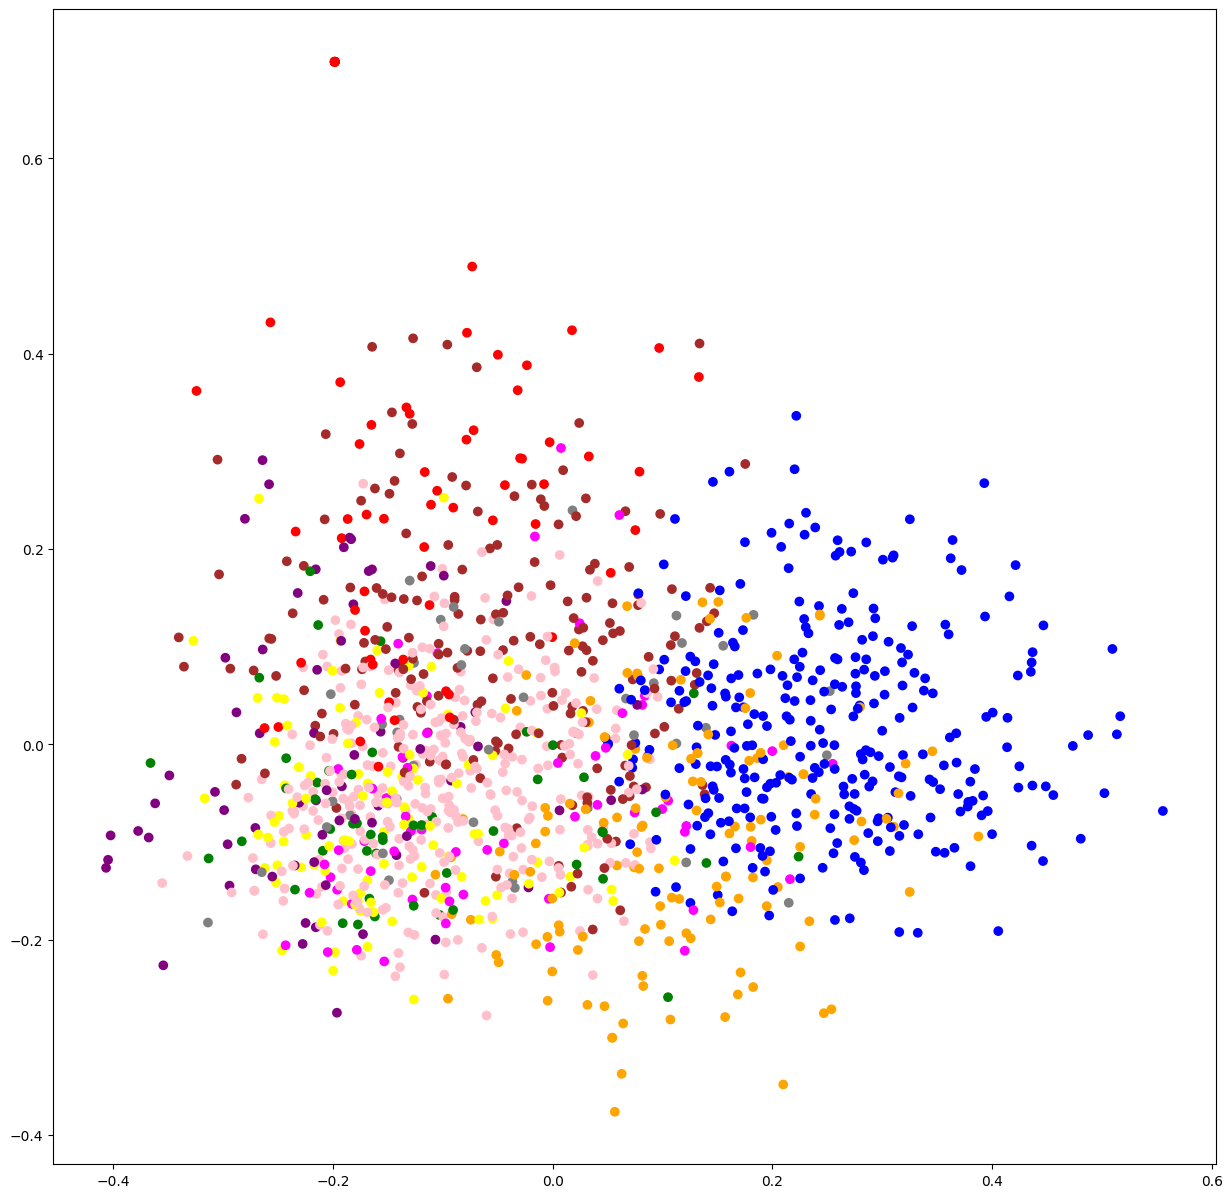

<Figure size 640x480 with 0 Axes>

In [ ]:
#Визуализация
kmeans_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = {
    0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'magenta',
    5: 'pink', 6: 'grey', 7: 'yellow', 8: 'brown', 9: 'purple'
}

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmeans_indices])



plt.show()
plt.savefig('trc.png')


In [ ]:
# Создаем словарь из получившихся токенов

gensim_dictionary_for_TM = gensim.corpora.Dictionary(preprocessed_texts)
gensim_dictionary_for_TM.filter_extremes(no_above=0.1) # , no_below=20
#gensim_dictionary_for_TM.compactify()
print(gensim_dictionary_for_TM)

Dictionary<5219 unique tokens: ['abondance', 'affamés', 'afrique', 'année', 'attention']...>


In [ ]:
corpus = [gensim_dictionary_for_TM.doc2bow(text) for text in preprocessed_texts]

In [ ]:
# раскладываем по "мешкам"

lda = gensim.models.LdaMulticore(corpus,
                                 num_topics = 10, # число топиков
                                 id2word=gensim_dictionary_for_TM,
                                 passes=10)

In [ ]:
lda.print_topics()

[(0,
  '0.007*"pis" + 0.006*"truc" + 0.005*"vraiment" + 0.004*"fille" + 0.004*"né" + 0.004*"belle" + 0.004*"yo" + 0.004*"xxx" + 0.004*"eau" + 0.004*"oui"'),
 (1,
  '0.009*"amis" + 0.007*"raison" + 0.005*"changer" + 0.005*"prendre" + 0.004*"rêve" + 0.004*"marcher" + 0.004*"petite" + 0.004*"mer" + 0.004*"voudrais" + 0.004*"avance"'),
 (2,
  '0.009*"black" + 0.005*"ben" + 0.005*"vas" + 0.005*"paris" + 0.005*"putain" + 0.004*"trois" + 0.004*"écoute" + 0.004*"mecs" + 0.004*"pète" + 0.004*"langue"'),
 (3,
  '0.008*"disiz" + 0.005*"pays" + 0.005*"xxx" + 0.005*"rap" + 0.005*"bête" + 0.005*"peste" + 0.004*"entends" + 0.004*"frères" + 0.004*"flex" + 0.004*"bombe"'),
 (4,
  '0.005*"eh" + 0.004*"cesse" + 0.004*"très" + 0.004*"peau" + 0.004*"mêmes" + 0.003*"chacun" + 0.003*"rêves" + 0.003*"ghetto" + 0.003*"âme" + 0.003*"souvent"'),
 (5,
  '0.007*"regarde" + 0.005*"bois" + 0.004*"met" + 0.004*"pression" + 0.004*"jours" + 0.004*"bouge" + 0.004*"baby" + 0.003*"life" + 0.003*"aimer" + 0.003*"eau"'),
 (

Визуализация LDA

In [ ]:
# Визуализация с помощью pyLDAvis
!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.0 MB/s eta 0:00:00


In [ ]:
vis = gensimvis.prepare(lda, corpus, gensim_dictionary_for_TM)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.022875 -0.018337       1        1  12.753150
6      0.002030 -0.008161       2        1  12.180103
3      0.042381 -0.051578       3        1  11.575927
8      0.042765 -0.119224       4        1  11.530698
2      0.141722  0.040447       5        1  10.259134
9     -0.059378 -0.030854       6        1  10.102233
1     -0.030748 -0.011179       7        1   8.490300
7     -0.123236  0.020847       8        1   8.220398
0      0.029623  0.106153       9        1   8.102542
5     -0.022283  0.071886      10        1   6.785516, topic_info=        Term        Freq       Total Category  logprob  loglift
1301     hey  307.000000  307.000000  Default  30.0000  30.0000
1821   salut  119.000000  119.000000  Default  29.0000  29.0000
1159   black  122.000000  122.000000  Default  28.0000  28.0000
3112   disiz  125.000000  125.000000  Default  27.0000  27.0000
308       ah  210.000000  210.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
758   prends   25.179715  192.019743  Topic10  -5.8403   0.6588
416     vite   23.514861  157.714578  Topic10  -5.9087   0.7872
525   raison   23.655177  170.178589  Topic10  -5.9027   0.7171
590   choses   23.876847  209.113190  Topic10  -5.8934   0.5204
1200     nom   22.774753  158.866282  Topic10  -5.9406   0.7480

[693 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1516      2  0.659032  abandonne
1516      4  0.043935  abandonne
1516      6  0.043935  abandonne
1516      8  0.087871  abandonne
1516     10  0.131806  abandonne
...     ...       ...        ...
4193      3  0.091349          ô
4193      6  0.091349          ô
4193      7  0.030450          ô
4193      8  0.487196          ô
4193      9  0.091349          ô

[3374 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 4, 9, 3, 10, 2, 8, 1, 6])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


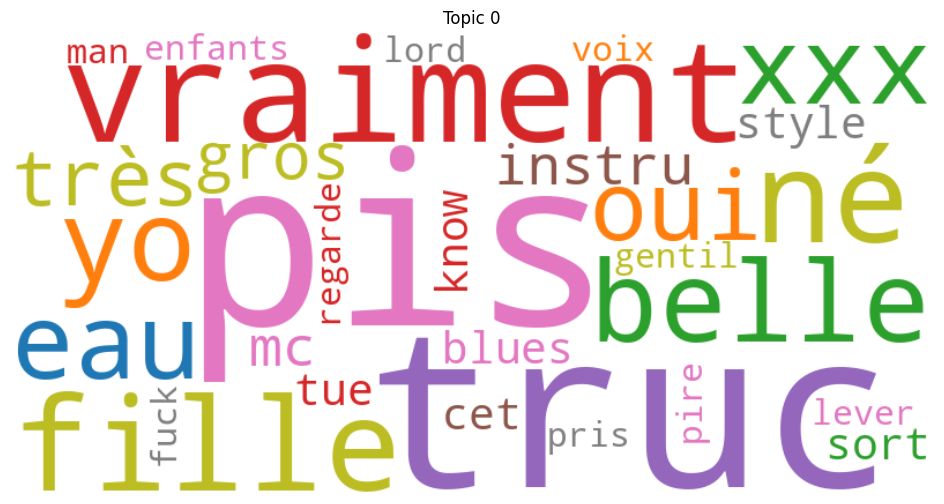

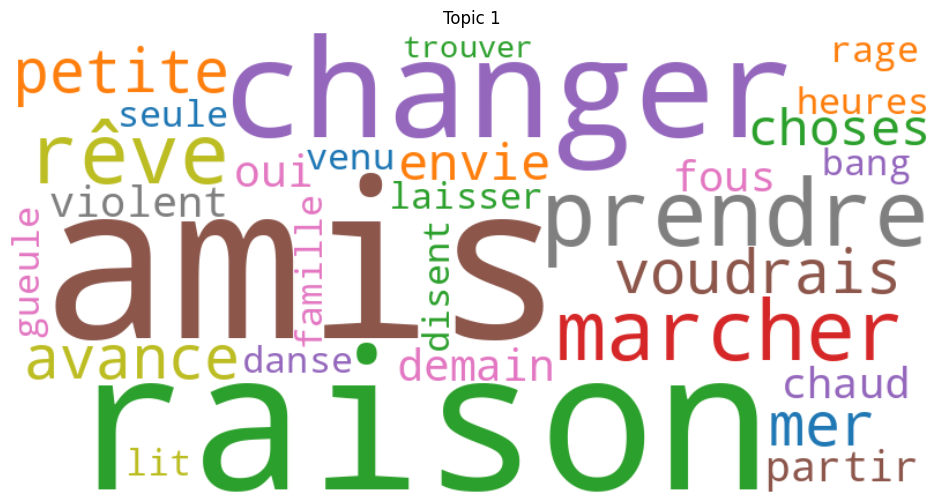

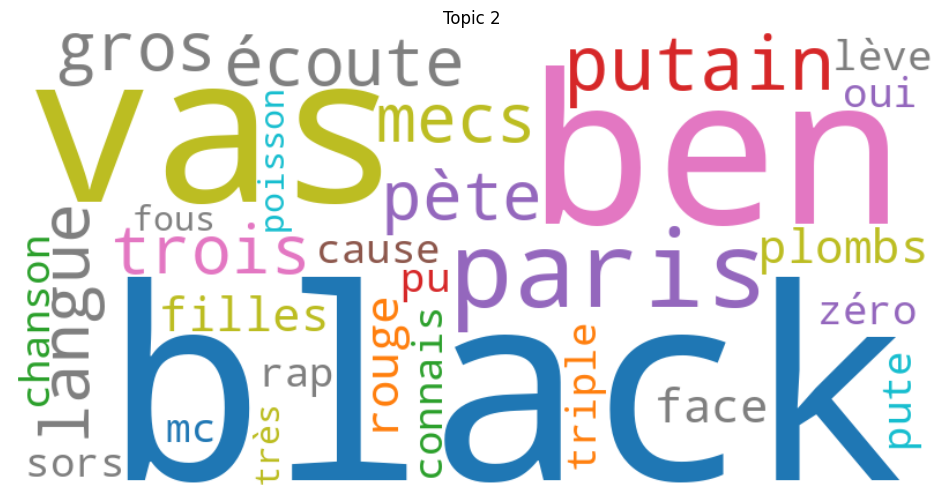

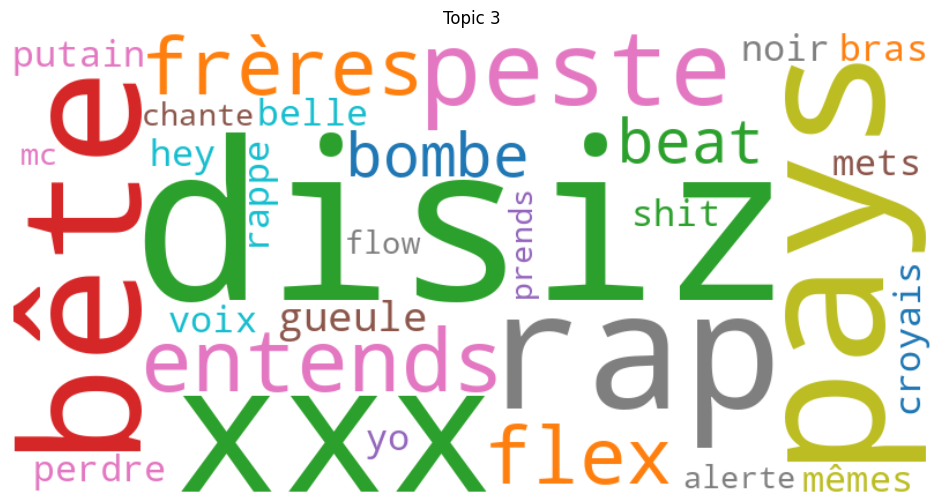

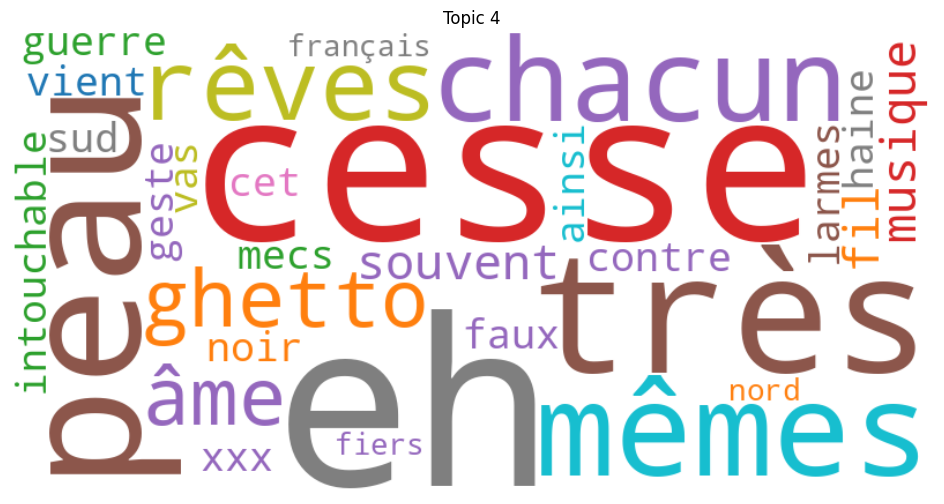

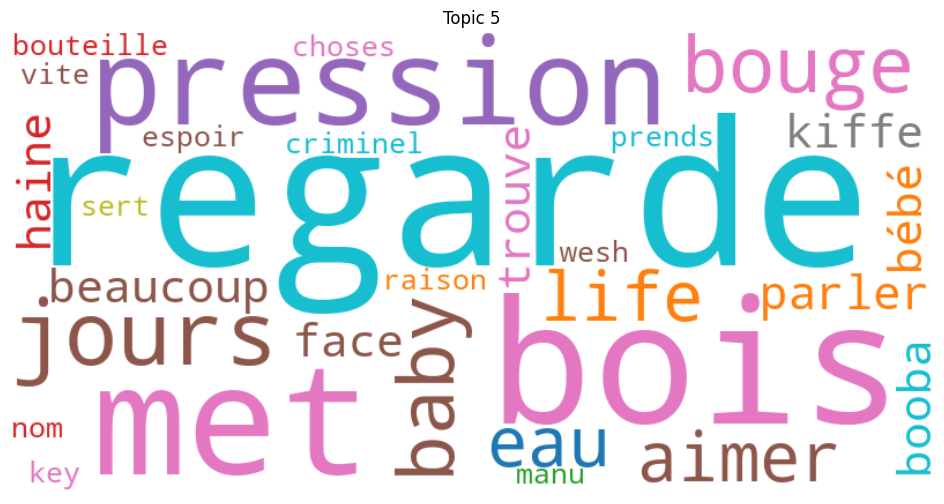

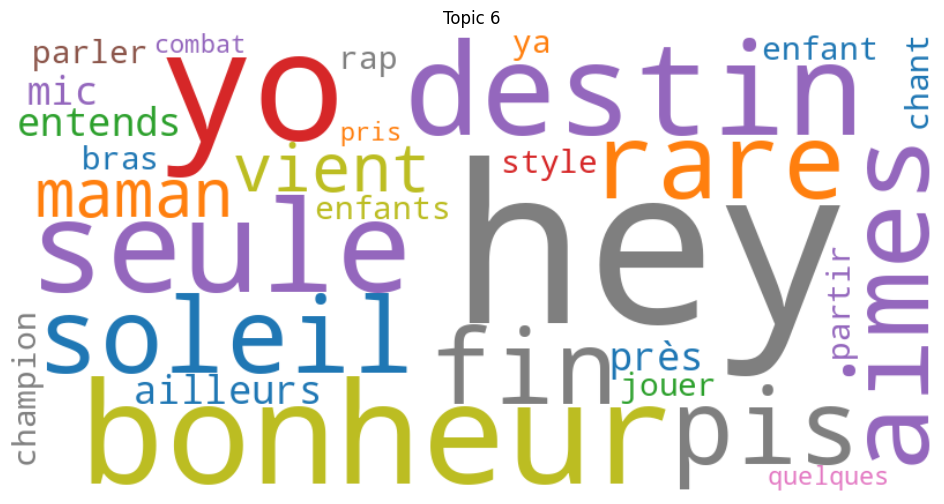

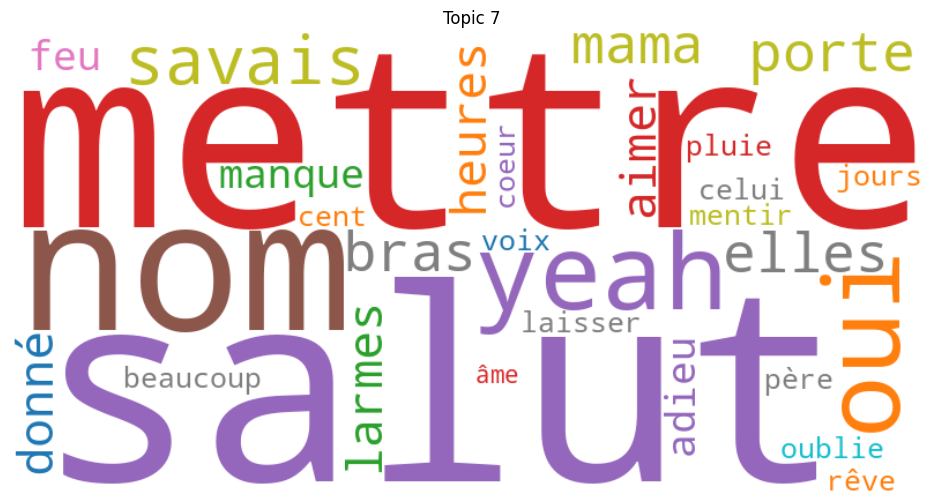

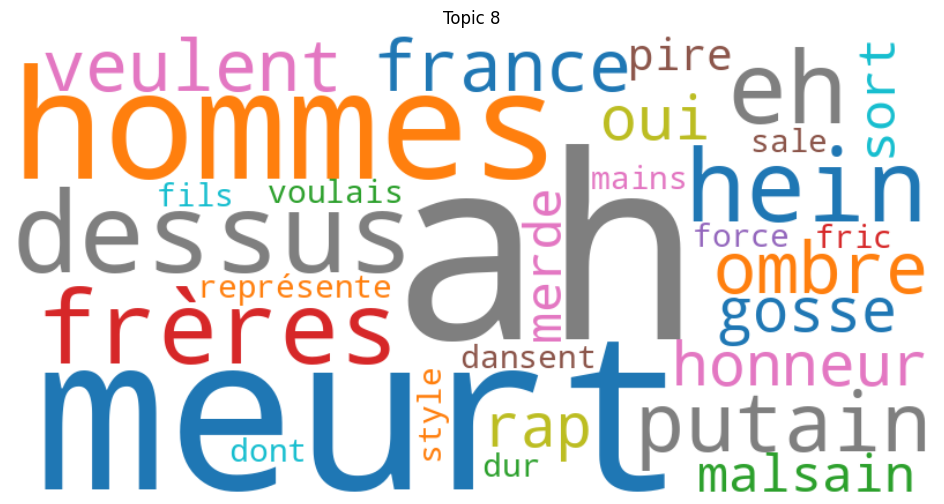

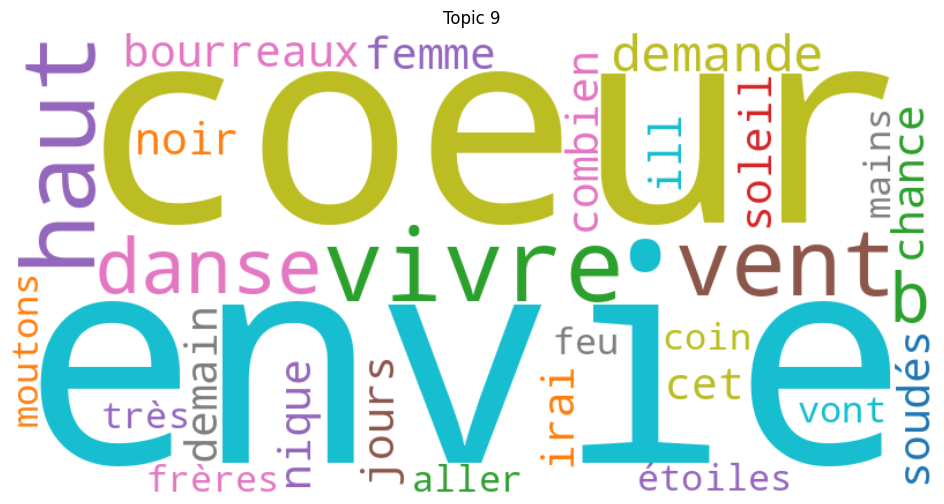

In [ ]:
# Визуализироем с помощью вордклауд

num_topics = 10

for topic in lda.show_topics(num_topics=num_topics, num_words=30, formatted=False):
    topic_num = topic[0]
    words = dict(topic[1])
    weights = {word: round(weight * 1000) for word, weight in words.items()}

    wordcloud = WordCloud(background_color="white", width=800, height=400, colormap="tab10").generate_from_frequencies(weights)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()